In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics

In [2]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

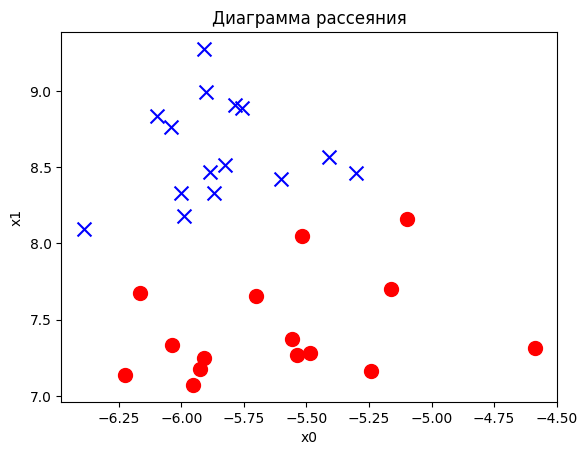

In [3]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [4]:
from sklearn.svm import SVC

Cоздадим и обучим модель классификации на основе метода опорных векторов (опорно-векторный классификатор). Используем высокое значение С для задания жесткого зазора между классами.

In [5]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

Коэффициенты линейной функции, используемой как граница принятия решения

In [6]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

свободный коэффициет

In [7]:
svm_linear.intercept_

array([-64.2533988])

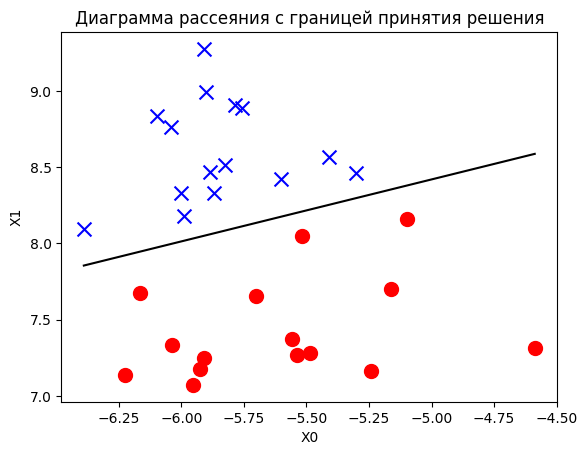

In [8]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

координаты опорных векторов

In [9]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

индексы опорных векторов в исходном наборе данных

In [10]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

количество опорных векторов

In [11]:
svm_linear.n_support_


array([1, 2], dtype=int32)

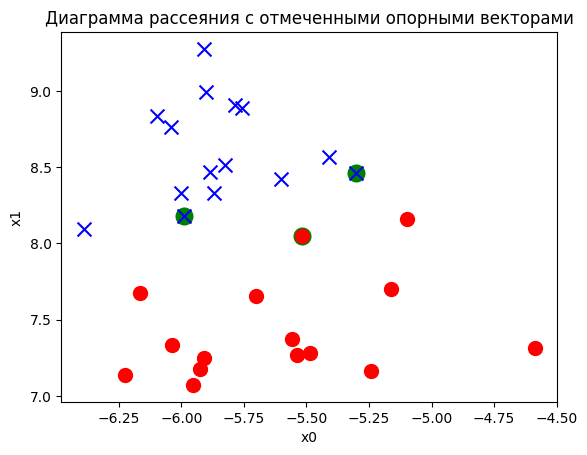

In [12]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

 граница принятия решения располагается ровно посередине зазора, а границы зазора проходят ровно через опорные вектора

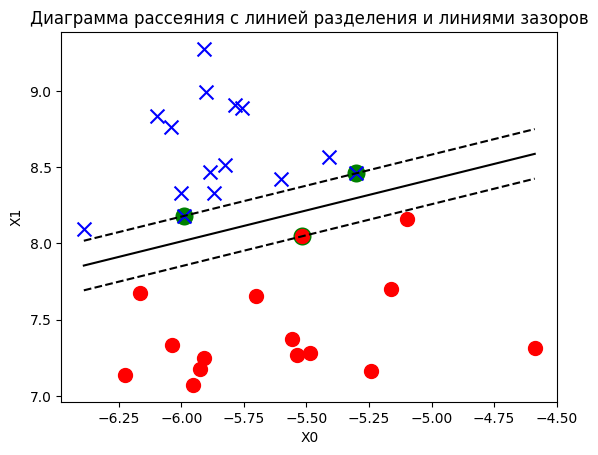

In [13]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

граница принятия решения как линии уровня на поверхности фукнции гипотезы

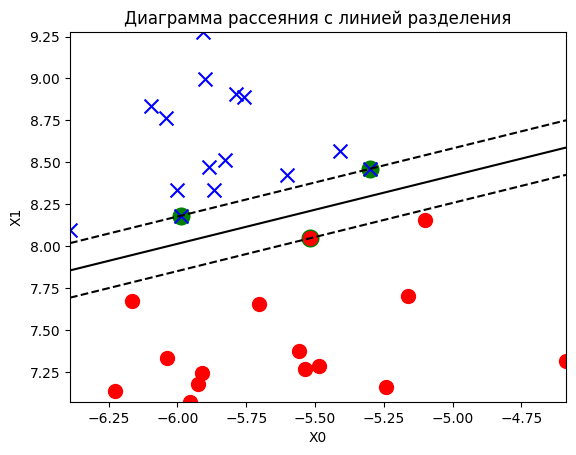

In [14]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [16]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

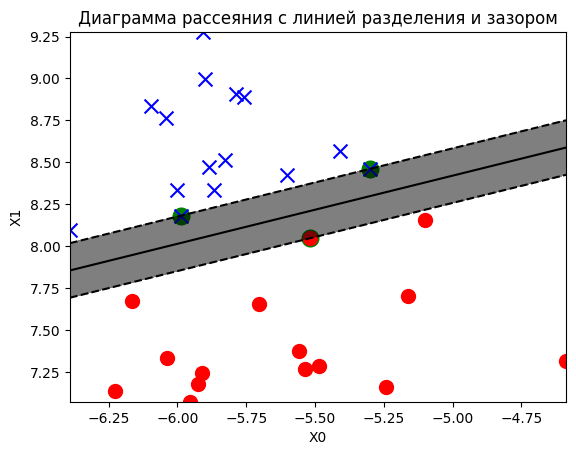

In [17]:
plot_decision_regions(X,y,svm_linear)

вектор предсказанных значений целевой переменной

In [18]:
y_pred =  svm_linear.predict(X)

Матрика точности

In [25]:
metrics.accuracy_score(y, y_pred)

1.0

матрицы классификации

In [26]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

Создадим новую точку

In [27]:
observation_new = [[-5.25, 7.5]]

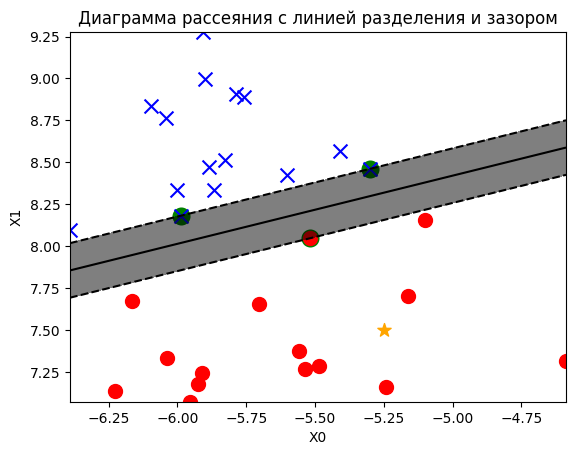

In [28]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

значение функции гипотезы в этой точке

In [29]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

предсказание класса

In [30]:
svm_linear.predict(observation_new)

array([0])

**Линейно неразделимые данные с зазором**




In [32]:
from sklearn.datasets import make_circles

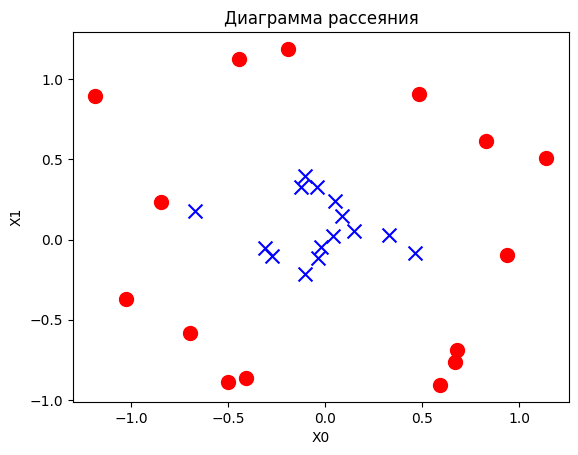

In [33]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Метод опорных векторов с Гаусовским ядром

In [34]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

Данные об опорных векторах

In [36]:
svm_rbf.n_support_


array([6, 2], dtype=int32)

In [37]:
svm_rbf.support_


array([11, 20, 21, 23, 28, 29, 25, 27], dtype=int32)

In [38]:
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

Построим данную модель

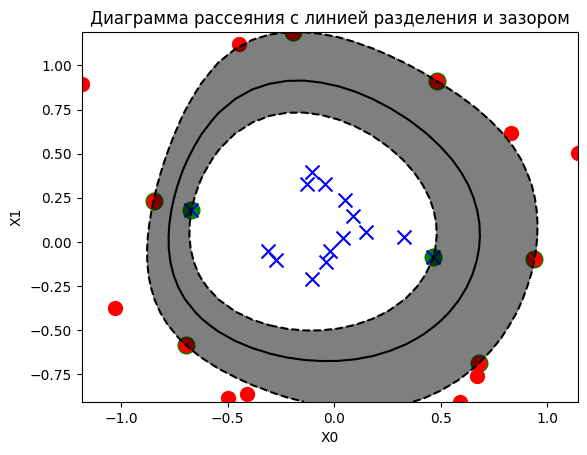

In [39]:
plot_decision_regions(X, y, svm_rbf)

In [44]:
y_pred=svm_rbf.predict(X)

In [45]:
metrics.accuracy_score(y, y_pred)


1.0

In [46]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

**Данные без зазора**

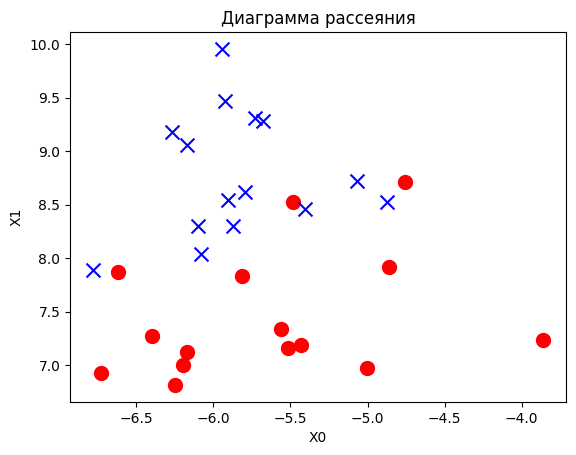

In [47]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

метод опорных векторов с так называемым мягким зазором. Это достигается уменьшением параметра регуляризации (С)

In [48]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

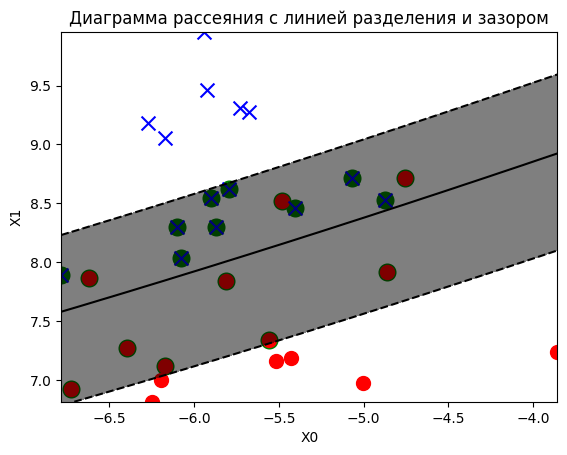

In [49]:
plot_decision_regions(X, y, svm_poly)

опорные вектора

In [50]:
svm_poly.n_support_

array([9, 9], dtype=int32)

чем меньше зазор между классами, тем менее эффективен метод опорных векторов

In [53]:
y_pred=svm_poly.predict(X)

In [54]:
metrics.accuracy_score(y, y_pred)


0.9

In [55]:
metrics.confusion_matrix(y, y_pred)

array([[12,  3],
       [ 0, 15]])

In [ ]:
Можно сделать вывод, что данная модель, хоть и не идеальная, все же довольно точно справляется с классификацией.